In [120]:
![imagen](../data/aq_image.jpeg)

"[imagen]" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


### LIBRERIAS

In [161]:
# MANIPULACIÓN Y ANÁLISIS DE DATOS

import numpy as np
import pandas as pd

# VISUALIZACIÓN DE DATOS

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import boxcox
import scipy.stats as stats
from scipy.stats import probplot
from scipy.stats import shapiro
from sklearn.cluster import KMeans

# OTROS
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

from pathlib import Path
import pickle

|Atributo|Descripción del significado|
|---|---|
|CO(GT)|Concentración promedio verdadera de CO por hora en mg/m^3 (analizador de referencia)|
|PT08.S1(CO)|Respuesta promedio del sensor PT08.S1 (óxido de estaño) por hora (teóricamente dirigida a CO)|
|NMHC(GT)|Concentración de Hidrocarburos No Metánicos en microg/m^3 (analizador de referencia)|
|C6H6(GT)|Concentración verdadera de Benceno por hora en microg/m^3 (analizador de referencia)|
|PT08.S2(NMHC)|Respuesta promedio del sensor PT08.S2 (titania) por hora (teóricamente dirigida a NMHC)|
|NOx (GT)|Concentración promedio verdadera de NOx por hora en ppb (analizador de referencia)|
|PT08.S3(NOx)|Respuesta promedio del sensor PT08.S3 (óxido de tungsteno) por hora|
|NO2(GT)|Concentración promedio verdadera de NO2 por hora en microg/m^3 (analizador de referencia)|
|PT08.S4(NO2)|Respuesta promedio del sensor PT08.S4 (óxido de tungsteno) por hora|
|PT08.S5(O3)|Respuesta promedio del sensor PT08.S5 (óxido de indio) por hora (teóricamente dirigida a O3)|
|T|Temperatura en °C|
|RH|Humedad Relativa (%)|
|AH|Humedad Absoluta (g/m^3)|

### DATASET

In [122]:
aq = pd.read_csv("../data/original_file/AirQuality.csv", sep=";")
aq = aq.copy()

### INFORMACIÓN PRELIMINAR

In [123]:
aq.shape    # 9471 filas y 17 columnas

(9471, 17)

In [124]:
aq.head()   # primeras 5 filas

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [125]:
aq.tail()   # últimas 5 filas

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
aq.sample(n=5)  # 5 filas aleatorias

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
4563,16/09/2004,21.00.00,2,997.0,-200.0,"9,4",955.0,214.0,845.0,94.0,1528.0,926.0,"21,2","55,2","1,3699",NaN,NaN
1328,05/05/2004,02.00.00,"0,5",820.0,-200.0,"1,5",541.0,18.0,1450.0,28.0,1360.0,377.0,"15,7","64,5","1,1400",NaN,NaN
1549,14/05/2004,07.00.00,"3,7",1388.0,-200.0,"22,8",1372.0,272.0,601.0,140.0,2105.0,1449.0,"18,5","49,4","1,0397",NaN,NaN
3446,01/08/2004,08.00.00,"0,8",971.0,-200.0,"4,2",722.0,39.0,876.0,35.0,1624.0,687.0,"25,0","60,7","1,8920",NaN,NaN
1580,15/05/2004,14.00.00,"1,3",916.0,-200.0,"6,4",829.0,82.0,1124.0,75.0,1333.0,621.0,"26,1","21,1","0,7023",NaN,NaN


In [127]:
aq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [128]:
aq.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,NaN,NaN
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,NaN,NaN
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,NaN,NaN
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,NaN,NaN
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,NaN,NaN


### LIMPIEZA DE DATOS

In [129]:
rows_without_nulls = aq.isnull().all(axis=1).sum()

print("Cantidad de filas con valores nulos en todas las columnas:", rows_without_nulls)

Cantidad de filas con valores nulos en todas las columnas: 114


De las 9471 observaciones, exceptuando las columnas 'Unnamed: 15' y 'Unnamed: 16' (que tienen NaNs en todas sus observaciones), 114 filas (1.20%) tienen NaNs en todos los parámetros, con lo cual no tiene sentido que permanezcan en el DataFrame, ya que no aportan nada al modelo.  

Las columnas "Unnamed: 15" y "Unnamed: 16" no son relevantes ya que no aportan información al ser nulos todos sus valores. Eliminarlas ayuda a reducir la dimensionalidad de los datos y simplificar el análisis.

In [130]:
# ELIMINACIÓN DE FILAS CON NULOS

rows_without_nulls_ = aq.dropna(how='all')
rows_without_nulls_

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568",NaN,NaN
9353,04/04/2005,11.00.00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119",NaN,NaN
9354,04/04/2005,12.00.00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406",NaN,NaN
9355,04/04/2005,13.00.00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139",NaN,NaN


In [131]:
# ELIMINACIÓN DE COLUMNAS CON NULOS

aq_without_unnecessary_columns = rows_without_nulls_.drop(["Unnamed: 15",	"Unnamed: 16"], axis=1)
aq_without_unnecessary_columns

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"


In [132]:
aq_without_unnecessary_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


- DUPLICADOS

In [133]:
num_duplicados = aq_without_unnecessary_columns.duplicated().sum()

if num_duplicados == 0:
    print("No existen observaciones duplicadas")
else:
    print(f"Existen {num_duplicados} observaciones duplicadas")

No existen observaciones duplicadas


In [134]:
cleaned_aq = aq_without_unnecessary_columns.copy()  # renombro el dataframe

- OUTLIERS

La columna CO(GT) tiene 0 outliers, que representan el 0.00% del total de filas.
La columna PT08.S1(CO) tiene 484 outliers, que representan el 5.11% del total de filas.
La columna NMHC(GT) tiene 855 outliers, que representan el 9.03% del total de filas.
La columna C6H6(GT) tiene 0 outliers, que representan el 0.00% del total de filas.
La columna PT08.S2(NMHC) tiene 26 outliers, que representan el 0.27% del total de filas.
La columna NOx(GT) tiene 331 outliers, que representan el 3.49% del total de filas.
La columna PT08.S3(NOx) tiene 204 outliers, que representan el 2.15% del total de filas.
La columna NO2(GT) tiene 1519 outliers, que representan el 16.04% del total de filas.


La columna PT08.S4(NO2) tiene 15 outliers, que representan el 0.16% del total de filas.
La columna PT08.S5(O3) tiene 30 outliers, que representan el 0.32% del total de filas.
La columna T tiene 0 outliers, que representan el 0.00% del total de filas.
La columna RH tiene 0 outliers, que representan el 0.00% del total de filas.
La columna AH tiene 0 outliers, que representan el 0.00% del total de filas.


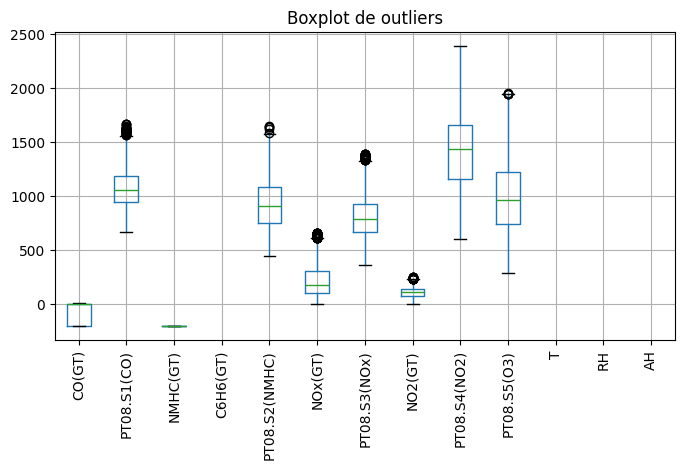

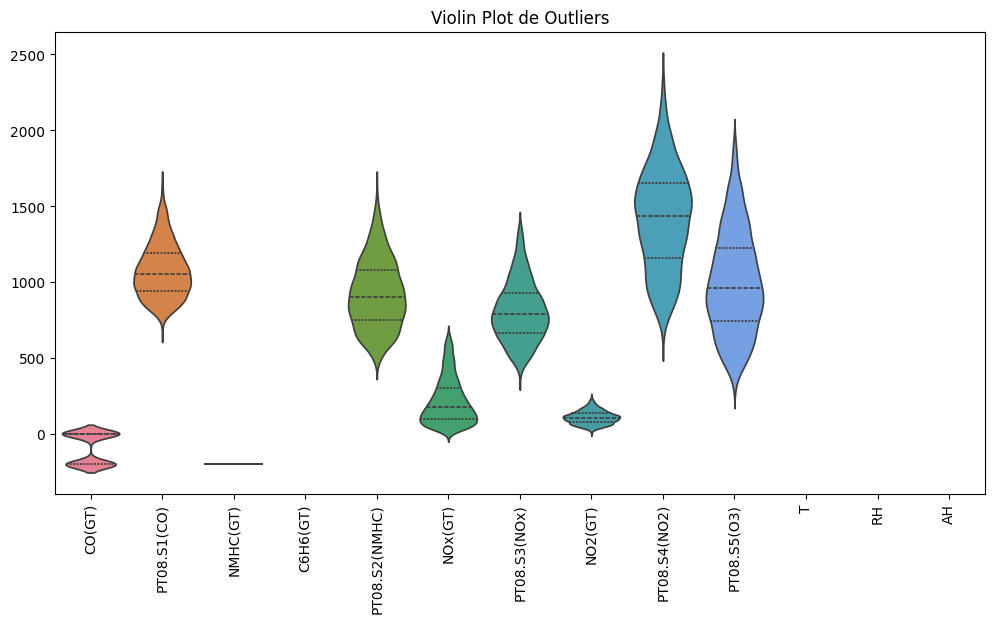

In [135]:
columnas_outliers = ["CO(GT)", "PT08.S1(CO)", "NMHC(GT)", "C6H6(GT)", "PT08.S2(NMHC)", 
                     "NOx(GT)", "PT08.S3(NOx)", "NO2(GT)", "PT08.S4(NO2)", "PT08.S5(O3)", 
                     "T", "RH", "AH"]

n_filas = aq.shape[0]

for col in columnas_outliers:
    # Convierte los datos a tipo numérico
    aq[col] = pd.to_numeric(aq[col], errors='coerce')

    # Calcula los cuartiles solo para columnas numéricas
    Q1 = aq[col].quantile(0.25)
    Q3 = aq[col].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = aq[(aq[col] < limite_inferior) | (aq[col] > limite_superior)]

    n_outliers = len(outliers)
    porcentaje = (n_outliers / n_filas) * 100

    print(f"La columna {col} tiene {n_outliers} outliers, que representan el {porcentaje:.2f}% del total de filas.")

    # Eliminar outliers para crear el DataFrame para el violin plot
    aq.drop(outliers.index, inplace=True)

# Boxplot de las columnas numéricas después de eliminar los outliers
aq[columnas_outliers].boxplot(rot=90, figsize=(8, 4))
plt.title("Boxplot de outliers")
plt.show()

# Graficar el violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=aq[columnas_outliers], inner="quartile")
plt.title("Violin Plot de Outliers")
plt.xticks(rotation=90)
plt.show()

In [136]:
# SEPARACIÓN DE LA FECHA

cleaned_aq_date = cleaned_aq.copy()

cleaned_aq_date['Date'] = pd.to_datetime(cleaned_aq_date['Date'], format='%d/%m/%Y')

cleaned_aq_date['Dia'] = cleaned_aq_date['Date'].dt.day
cleaned_aq_date['Mes'] = cleaned_aq_date['Date'].dt.month
cleaned_aq_date['Año'] = cleaned_aq_date['Date'].dt.year

cleaned_aq_date.drop(columns=['Date'], inplace=True)

cleaned_aq_date.insert(0, 'Año', cleaned_aq_date.pop('Año'))
cleaned_aq_date.insert(0, 'Mes', cleaned_aq_date.pop('Mes'))
cleaned_aq_date.insert(0, 'Dia', cleaned_aq_date.pop('Dia'))

In [137]:
# Reemplazo de "," por "." y modificación de decimales
cleaned_aq_date[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)',
                 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 
                 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 
                 'PT08.S5(O3)', 'T', 'RH', 'AH']] = cleaned_aq_date[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)',
                                                                     'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 
                                                                     'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 
                                                                     'PT08.S5(O3)', 'T', 'RH', 'AH']].replace(',', '.', regex=True).astype(float).round(decimals=2)

# Modificación en formato columna "Time"
cleaned_aq_date['Time'] = cleaned_aq_date['Time'].str.split('.').str[0]

In [138]:
# Eliminación de las columnas con valores no numéricos, y reemplazo de coma por punto.
cleaned_aq_numerico = cleaned_aq.drop(['Date', 'Time'], axis=1)
cleaned_aq_numerico = cleaned_aq_numerico.replace(',', '.', regex=True)

La columna CO(GT) tiene 0 outliers, que representan el 0.00% del total de filas.
La columna PT08.S1(CO) tiene 30 outliers, que representan el 0.50% del total de filas.
La columna NMHC(GT) tiene 0 outliers, que representan el 0.00% del total de filas.
La columna C6H6(GT) tiene 0 outliers, que representan el 0.00% del total de filas.
La columna PT08.S2(NMHC) tiene 4 outliers, que representan el 0.07% del total de filas.
La columna NOx(GT) tiene 71 outliers, que representan el 1.18% del total de filas.
La columna PT08.S3(NOx) tiene 48 outliers, que representan el 0.80% del total de filas.
La columna NO2(GT) tiene 25 outliers, que representan el 0.42% del total de filas.
La columna PT08.S4(NO2) tiene 1 outliers, que representan el 0.02% del total de filas.
La columna PT08.S5(O3) tiene 10 outliers, que representan el 0.17% del total de filas.
La columna T tiene 0 outliers, que representan el 0.00% del total de filas.
La columna RH tiene 0 outliers, que representan el 0.00% del total de fila

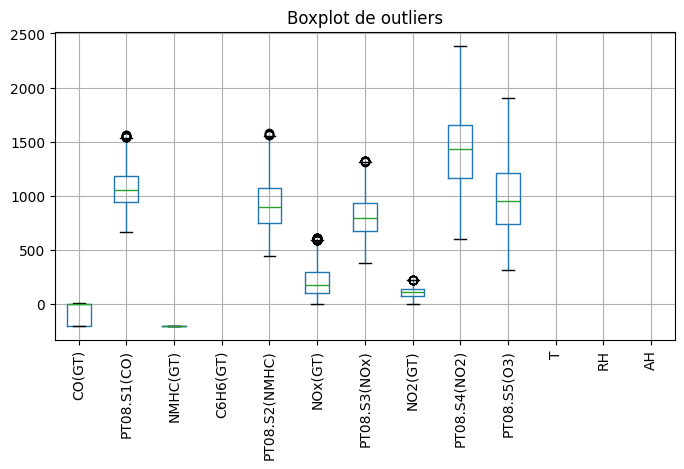

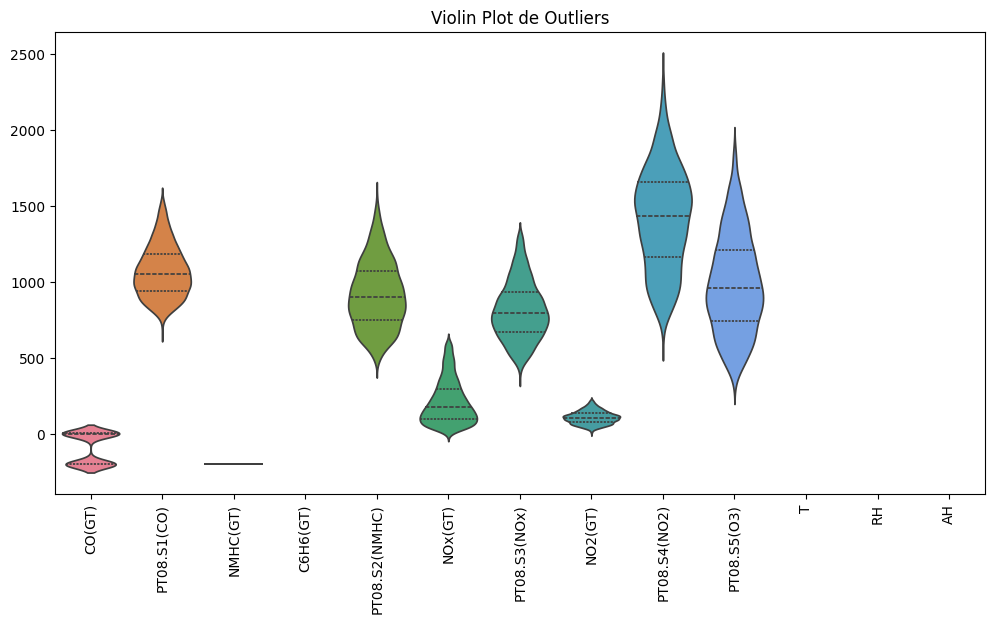

In [139]:
# Se corrobora el impacto luego de la la transformación logarítmica
n_filas = aq.shape[0]

for col in cleaned_aq_numerico:
    aq[col] = pd.to_numeric(aq[col], errors='coerce')

    Q1 = aq[col].quantile(0.25)
    Q3 = aq[col].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = aq[(aq[col] < limite_inferior) | (aq[col] > limite_superior)]

    n_outliers = len(outliers)
    porcentaje = (n_outliers / n_filas) * 100

    print(f"La columna {col} tiene {n_outliers} outliers, que representan el {porcentaje:.2f}% del total de filas.")
    
    aq.drop(outliers.index, inplace=True)

aq[columnas_outliers].boxplot(rot=90, figsize=(8, 4))
plt.title("Boxplot de outliers")
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(data=aq[columnas_outliers], inner="quartile")
plt.title("Violin Plot de Outliers")
plt.xticks(rotation=90)
plt.show()

### VISUALIZACIÓN. ANÁLISIS UNI Y BIVARIANTE

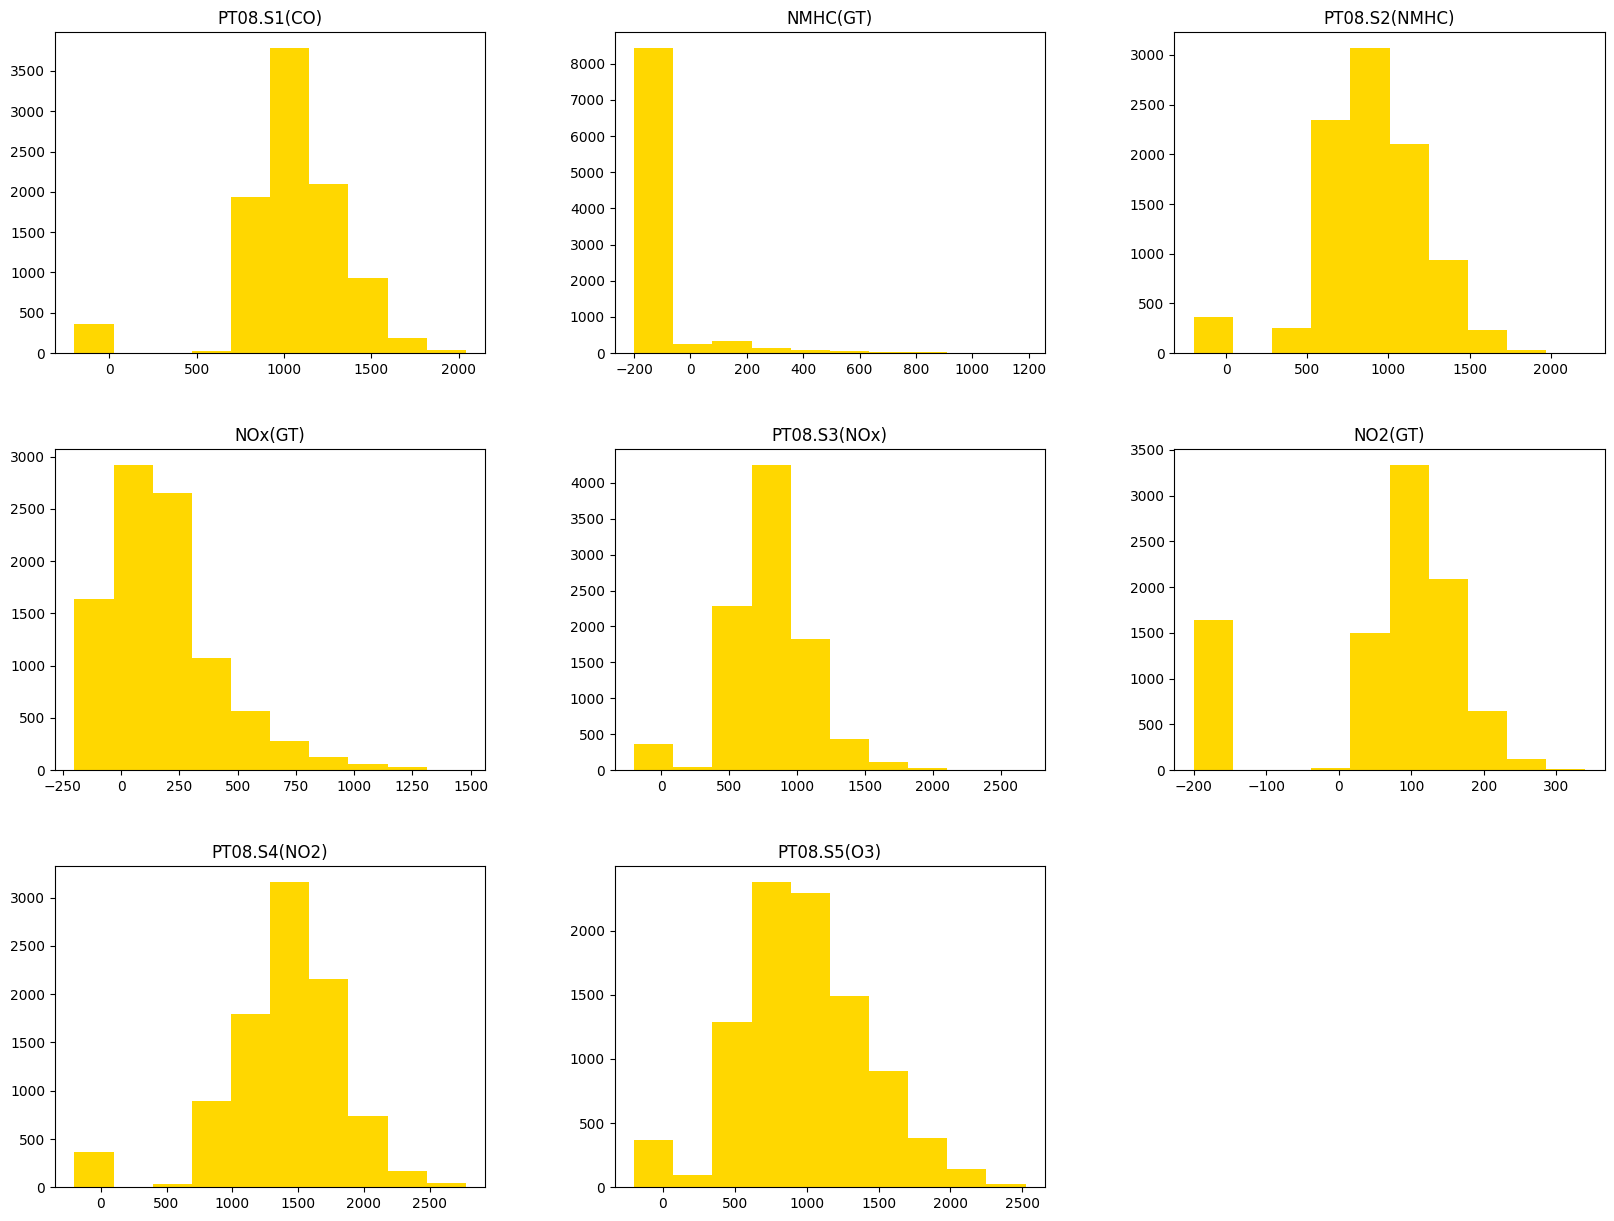

In [140]:
# HISTOGRAMA DE LAS VARIABLES PARA EVALUAR SI EXISTE DISTRIBUCIÓN NORMAL DE LOS DATOS.

cleaned_aq_numerico.hist(figsize=(20,15), grid=False, color='gold');
plt.show()

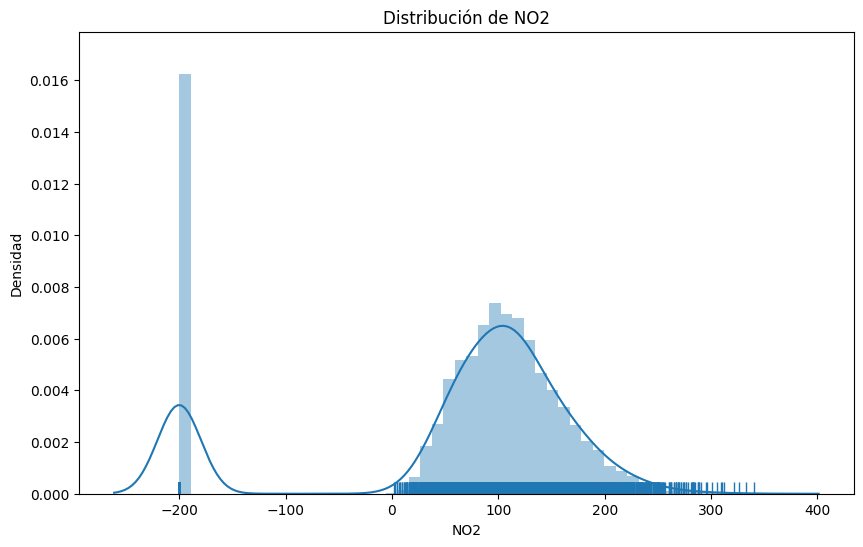

In [141]:
NO2 = cleaned_aq_numerico[['NO2(GT)']]

plt.figure(figsize=(10, 6))
sns.distplot(NO2, rug=True)

plt.xlabel('NO2')
plt.ylabel('Densidad')
plt.title('Distribución de NO2')

plt.show()

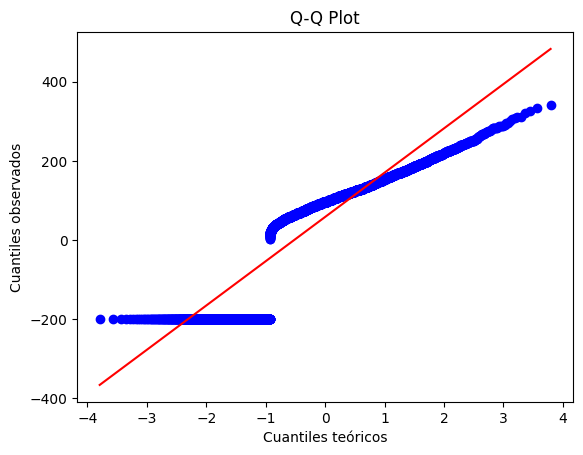

In [142]:
probplot(cleaned_aq_numerico['NO2(GT)'], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Cuantiles observados")
plt.show()

In [143]:
prueba_normalidad = cleaned_aq_numerico['NO2(GT)'].values

# Realizar la prueba de Shapiro-Wilk
statistic, p_value = shapiro(prueba_normalidad)

print("Estadístico de Shapiro-Wilk:", statistic)
print("Valor p:", p_value)

alpha = 0.05
if p_value < alpha:
    print("""La distribución estadística de la concentración de NO2 
no sigue una distribución normal.""")
else:
    print("""La distribución estadística de la concentración de NO2 
sigue una distribución normal.""")

Estadístico de Shapiro-Wilk: 0.7774103879928589
Valor p: 0.0
La distribución estadística de la concentración de NO2 
no sigue una distribución normal.


<Figure size 1000x800 with 0 Axes>

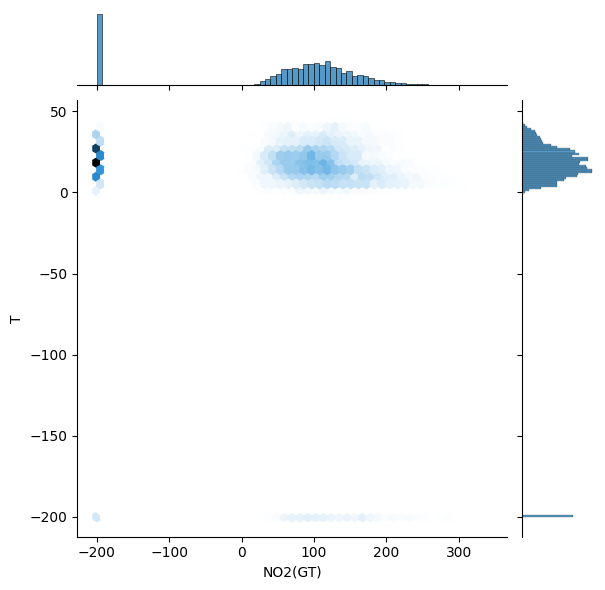

In [150]:
cleaned_aq_numerico['NO2(GT)'] = pd.to_numeric(cleaned_aq_numerico['NO2(GT)'], errors='coerce')
cleaned_aq_numerico['T'] = pd.to_numeric(cleaned_aq_numerico['T'], errors='coerce')

plt.figure(figsize=(10, 8))

sns.jointplot(data=cleaned_aq_numerico, x='NO2(GT)', y='T', kind='hex')

plt.show()

Se corrobora de manera muy clara con este gráfico la relación entre estas dos variables. Exceptuando el valor -200, la mayor cantidad de datos se encuentran concentrados en la intersección entre 10 y 30 grados de T y entre 50 y 150 de concentración de NO2.

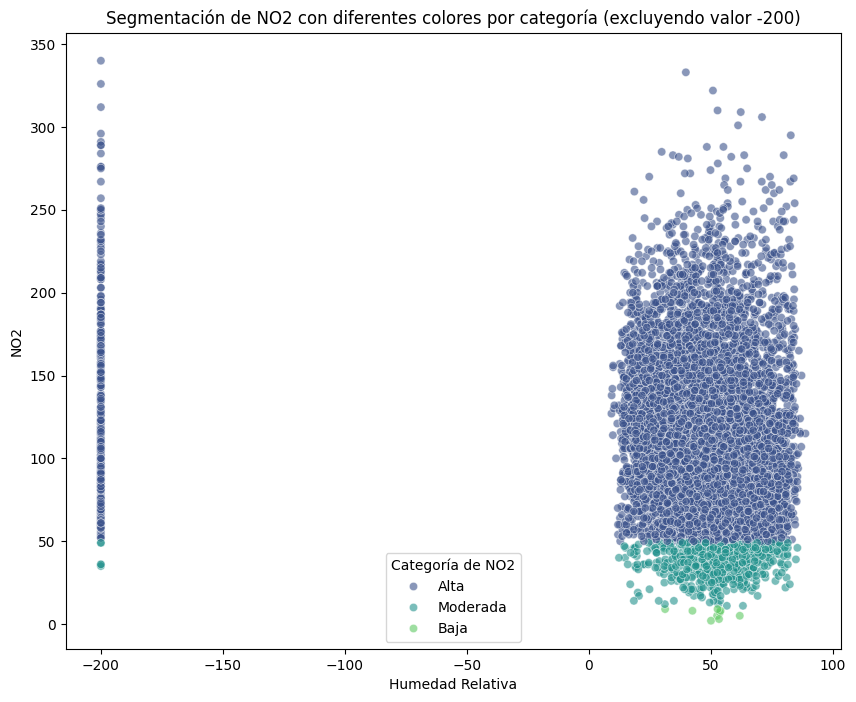

In [165]:
cleaned_aq_numerico_filtered = cleaned_aq_numerico[cleaned_aq_numerico['NO2(GT)'] != -200]

# Definir los límites de cada categoría de concentración de NO2
low_limit = 10
high_limit = 50

# Asignar cada punto a una categoría según su concentración de NO2
cleaned_aq_numerico_filtered['NO2_category'] = np.where(cleaned_aq_numerico_filtered['NO2(GT)'] < low_limit, 'Baja',
                                                        np.where(cleaned_aq_numerico_filtered['NO2(GT)'] < high_limit, 'Moderada', 'Alta'))

# Visualizar los datos con diferentes colores para cada categoría
plt.figure(figsize=(10, 8))
sns.scatterplot(data=cleaned_aq_numerico_filtered, x='RH', y='NO2(GT)', hue='NO2_category', palette='viridis', alpha=0.6)
plt.xlabel('Humedad Relativa')
plt.ylabel('NO2')
plt.title('Segmentación de NO2 con diferentes colores por categoría (excluyendo valor -200)')
plt.legend(title='Categoría de NO2')
plt.show()


In [ ]:
# Conversión de las columnas no numéricas a tipos de datos numéricos
cleaned_aq_numerico['CO(GT)'] = pd.to_numeric(cleaned_aq_numerico['CO(GT)'], errors='coerce')
cleaned_aq_numerico['C6H6(GT)'] = pd.to_numeric(cleaned_aq_numerico['C6H6(GT)'], errors='coerce')
cleaned_aq_numerico['T'] = pd.to_numeric(cleaned_aq_numerico['T'], errors='coerce')
cleaned_aq_numerico['RH'] = pd.to_numeric(cleaned_aq_numerico['RH'], errors='coerce')
cleaned_aq_numerico['AH'] = pd.to_numeric(cleaned_aq_numerico['AH'], errors='coerce')

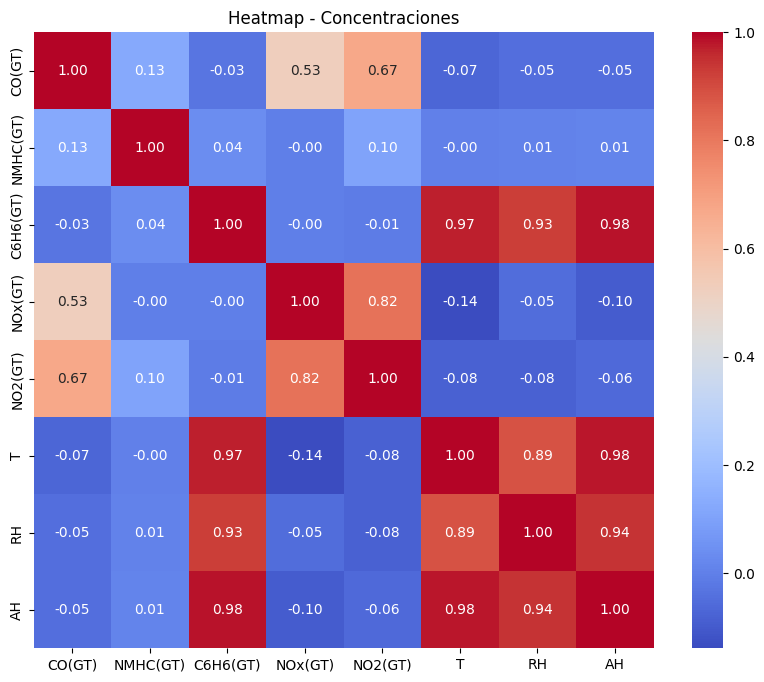

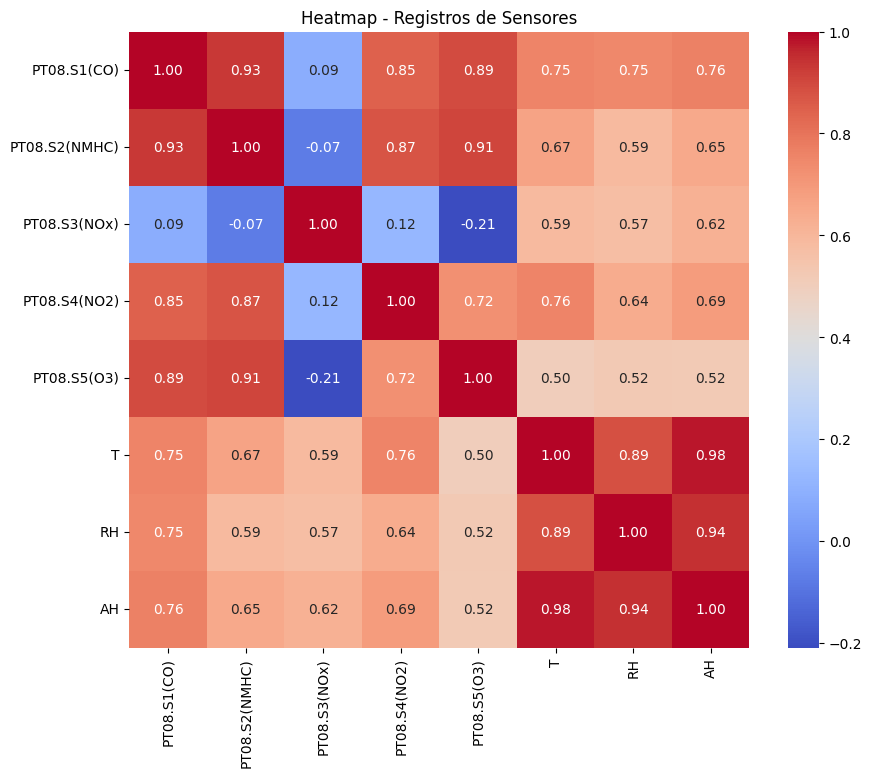

In [ ]:
# VISUALIZACIÓN DE LA CONCENTRACIÓN DE LOS CONTAMINANTES ATMOSFÉRICOS POR UN LADO Y DE LA MEDICIÓN 
# PROMEDIO DE LOS SENSORES POR OTRO.

columnas_concentraciones = ['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH', 'AH']
columnas_registros = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']

aq_concentraciones = cleaned_aq[columnas_concentraciones]
aq_registros = cleaned_aq[columnas_registros]

aq_concentraciones = aq_concentraciones.replace(',', '.', regex=True)
aq_registros = aq_registros.replace(',', '.', regex=True)

plt.figure(figsize=(10, 8))
sns.heatmap(aq_concentraciones.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap - Concentraciones')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(aq_registros.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap - Registros de Sensores')
plt.show()

Con la visualización separada del gráfico heatmap se puede ver una clara diferencia entre las variables de concentración de elementos y las correspondientes a la medición promedio de los sensores fundamentalmente en lo que respecta a las variables temperatura y humedad, donde en los casos de registros de sensores parece haber mayor correlación entre las variables.

In [ ]:
X = cleaned_aq_numerico.drop(columns=['NO2(GT)'])

# Calculo del VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

         Variable          VIF
0          CO(GT)     1.952667
1     PT08.S1(CO)   199.409768
2        NMHC(GT)     3.261208
3        C6H6(GT)   558.638175
4   PT08.S2(NMHC)   343.616909
5         NOx(GT)     4.306093
6    PT08.S3(NOx)    17.294259
7    PT08.S4(NO2)   191.821558
8     PT08.S5(O3)    63.667813
9               T   193.757637
10             RH    56.254581
11             AH  1142.837309


Las variables 'CO(GT)', 'NMHC(GT)', 'NOx(GT)', 'PT08.S3(NOx)', 'PT08.S5(O3)', 'RH' tienen un VIF menor que 5, lo que sugiere una multicolinealidad leve con respecto a las otras variables.  

En cambio, las variables 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S4(NO2)', 'T', 'AH' tienen un VIF significativamente mayor que 5, lo que indica una multicolinealidad elevada con respecto a las otras variables. Esto sugiere realizar alguna técnica de regularización o eliminación de variable, lo que ayudaría a mejorar la calidad del mismo y las predicciones.

In [ ]:
air = Path().cwd().parent / "data" / "cleaned_file" / "air_quality.csv"
cleaned_aq_numerico.to_csv(str(air), index=False)